# **Regression Project: Boston House Price Prediction**



Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a suburb or town in a Boston. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries and overview of the dataset**

In [1]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [2]:
df = pd.read_csv("Boston.csv") ## Complete the code

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


**Observations:**

1. The dataset consists of various features such as CRIM (per capita crime rate), ZN (proportion of residential land zoned for large lots), INDUS (proportion of non-retail business acres), CHAS (Charles River dummy variable), NOX (nitric oxide concentration), RM (average number of rooms per dwelling), AGE (proportion of owner-occupied units built before 1940), DIS (weighted distances to employment centers), RAD (index of accessibility to radial highways), TAX (property-tax rate), PTRATIO (pupil-teacher ratio), LSTAT (% lower status of the population), and the target variable MEDV (median value of owner-occupied homes in $1000).

2. Each row represents a town or suburb in Boston, and the corresponding values for each feature are provided.

3. The target variable (MEDV) is the variable we want to predict using regression analysis.

4. The dataset appears to have a mix of numerical and categorical features, which may require preprocessing before building a regression model.

### **Data Overview**

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


**Observations:**

- There are a total of **506 non-null observations in each of the columns**. This indicates that there are **no missing values** in the data.
- There are **13 columns** in the dataset and **every column is of numeric data type**.

In [11]:
# Check for duplicate entries in the dataframe
duplicates = df.duplicated()

# Display the duplicate entries
duplicates


0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool

### **Summary Statistics of this Dataset**

In [12]:
# Print the statistical summary of the dataframe
print(df.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534   12.653063   
std     28.148861    2.1057

**Observation:**

**Data Completeness:** The dataset is complete with no missing values, as indicated by the count for each feature being 506.

**Data Distribution:**

**CRIM (Per Capita Crime Rate):** The crime rate varies widely across towns, as evidenced by the high standard deviation. The range is from very low values (min: 0.00632) to high values (max: 88.9762).
**RM (Average Number of Rooms):** The average number of rooms per dwelling ranges from 3.561 to 8.78, with a mean of approximately 6.28.
**MEDV (Median Value of Owner-Occupied Homes):** The target variable shows a wide range from 5.0 to 50.0, with a mean of approximately 22.53.

**Feature Scale:**

Different features have different scales. For example, CRIM is a small decimal value, while RAD (index of accessibility to radial highways) and TAX (property-tax rate) are larger integers.

**Feature Relationships:**

The percentiles provide insights into the spread of the data. For instance, the 25th percentile (Q1) to the 75th percentile (Q3) range for MEDV is between 17.025 and 25.0.

### Checking for missing values

In [16]:
# Check for missing values in the dataframe
missing_values = df.isnull().sum()

# Display the count of missing values for each column
missing_values


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

## **Exploratory Data Analysis and Data Preprocessing**

### **Univariate Analysis**

**Let's check the distribution of the variables**

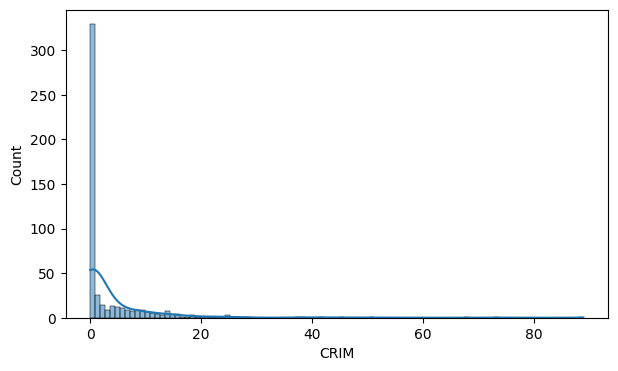

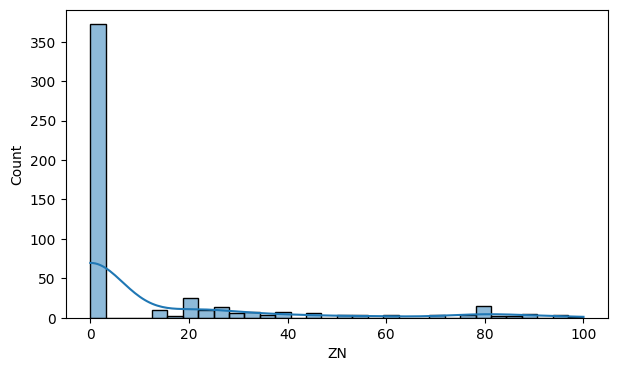

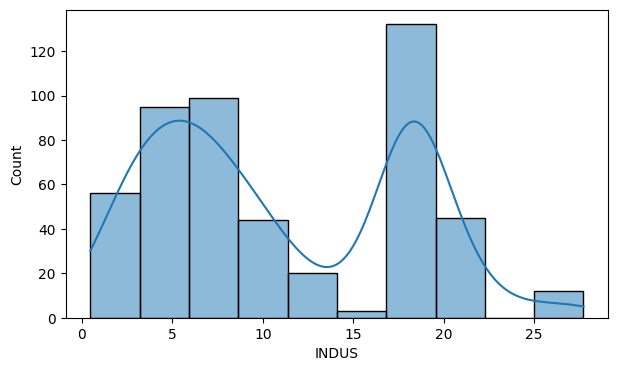

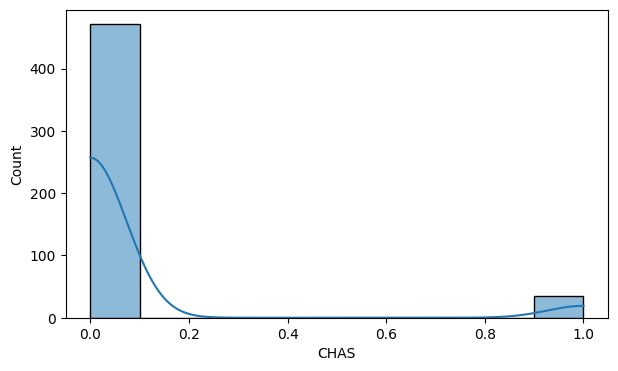

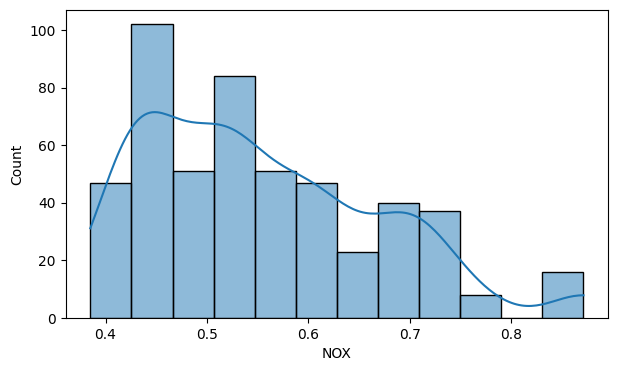

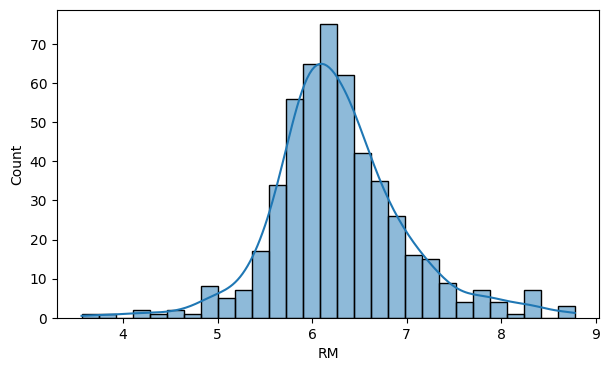

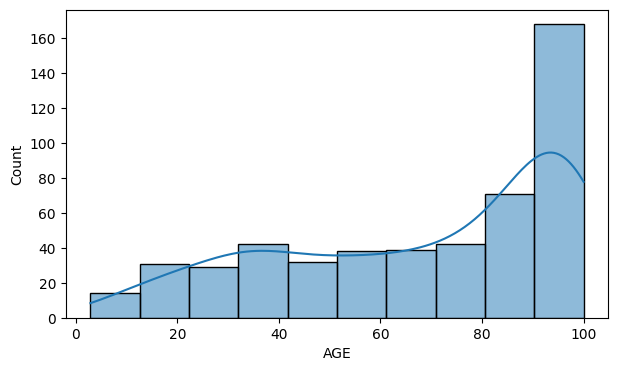

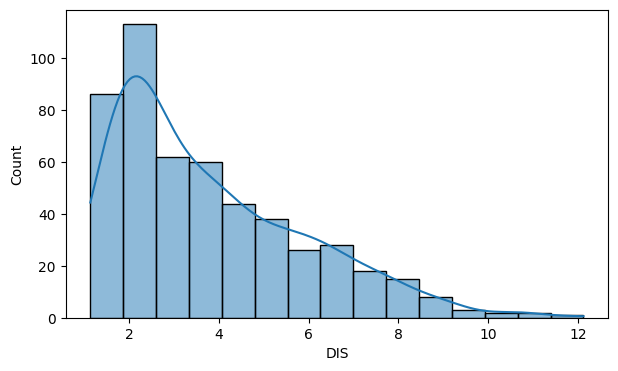

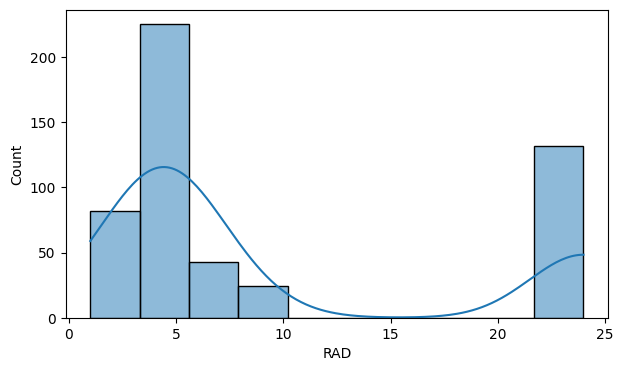

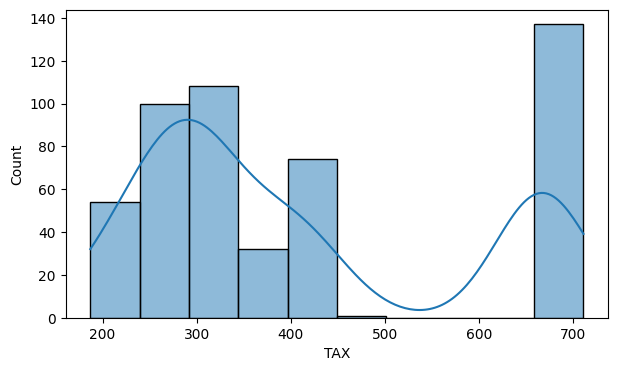

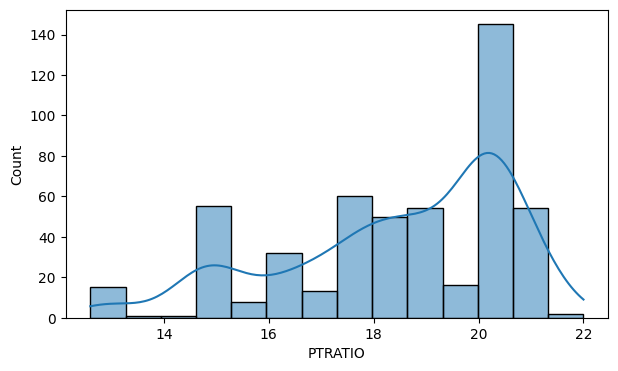

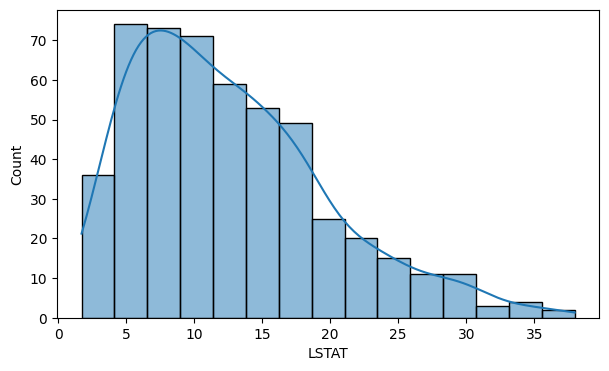

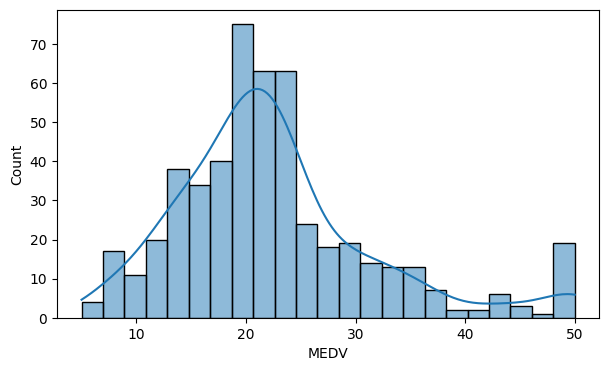

In [17]:
# Plotting all the columns to look at their distributions
for i in df.columns:

    plt.figure(figsize = (7, 4))
    sns.histplot(data = df, x = i, kde = True)
    plt.show()

**Observations:**

**CRIM (Per Capita Crime Rate): **The distribution is right-skewed, indicating that most towns have a lower crime rate, but there are a few towns with higher crime rates.

**ZN (Proportion of Residential Land Zoned for Lots Over 25,000 sq. ft.):** This variable is highly right-skewed, with the majority of towns having a ZN value of 0, suggesting that a large proportion of towns have no residential land zoned for large lots.

**INDUS (Proportion of Non-Retail Business Acres per Town):** The distribution shows a bimodal pattern, with peaks around 5 and 20. This suggests the presence of two subgroups of towns with different levels of non-retail business acres.

**CHAS (Charles River Dummy Variable):** This is a categorical variable, and the histogram shows the distribution of the binary values (0 or 1). The majority of towns have CHAS equal to 0.

**NOX (Nitric Oxide Concentration):** The distribution is somewhat right-skewed, with a concentration of towns having lower nitric oxide concentrations.

**RM (Average Number of Rooms per Dwelling):** The distribution is approximately normal, with a peak around 6-7 rooms per dwelling.

**AGE (Proportion of Owner-Occupied Units Built Before 1940):** The distribution is right-skewed, indicating that a majority of towns have a higher proportion of older owner-occupied units.

**DIS (Weighted Distances to Five Boston Employment Centers):** The distribution is right-skewed, suggesting that most towns are relatively close to employment centers.

**RAD (Index of Accessibility to Radial Highways):** This is a discrete variable, and the histogram shows the distribution of accessibility index values. It appears to be right-skewed.

**TAX (Full-Value Property-Tax Rate per $10,000):** The distribution is right-skewed, with peaks around certain tax rates.

**PTRATIO (Pupil-Teacher Ratio):** The distribution is relatively normal, with a peak around 20.

**LSTAT (% Lower Status of the Population):** The distribution is right-skewed, indicating that a majority of towns have a lower percentage of lower-status population.

**MEDV (Median Value of Owner-Occupied Homes):** The distribution is somewhat normal with a tail on the right, suggesting that most towns have median home values clustered around a certain range.

As the dependent variable is sightly skewed, we will apply a **log transformation on the 'MEDV' column** and check the distribution of the transformed column.

In [18]:
df['MEDV_log'] = np.log(df['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

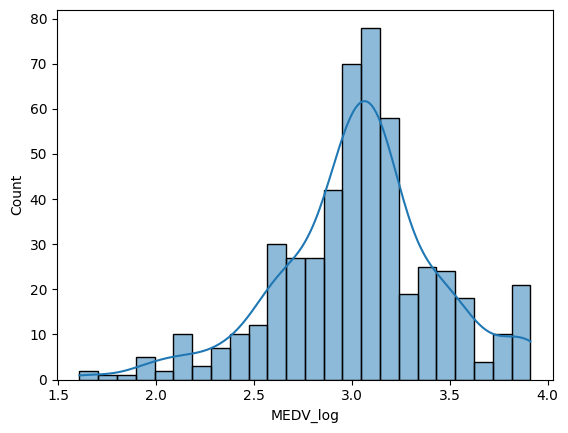

In [19]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

**Observation:**

- The log-transformed variable (**MEDV_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceed.

Before creating the linear regression model, it is important to check the bivariate relationship between the variables. Let's check the same using the heatmap and scatterplot.

### **Bivariate Analysis**

**Let's check the correlation using the heatmap**

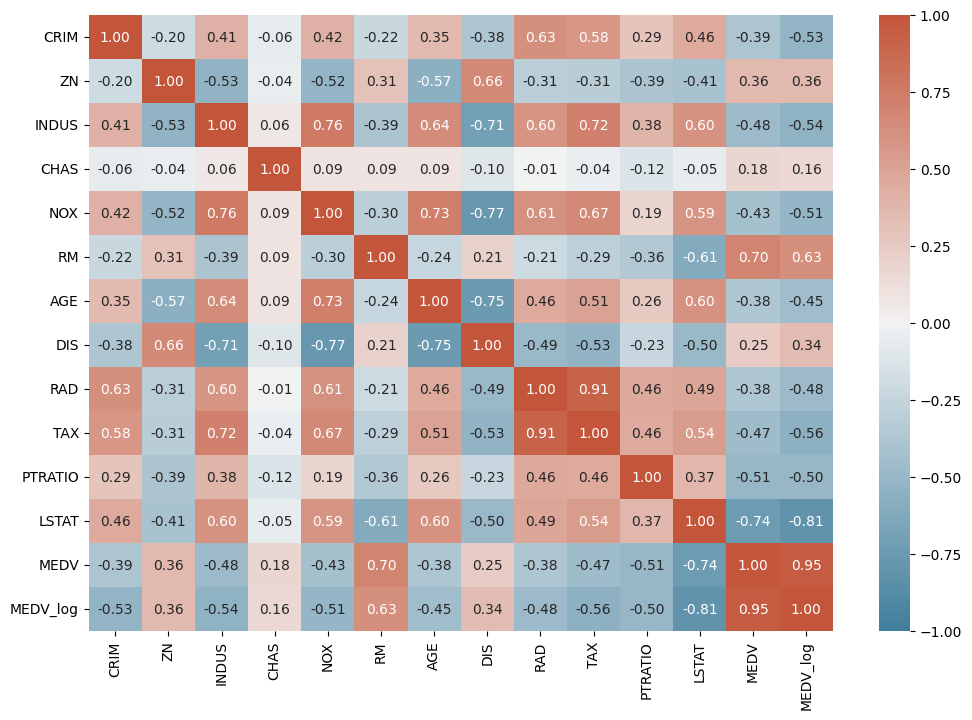

In [22]:
plt.figure(figsize=(12, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plotting the correlation matrix heatmap with specified color bar range
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=cmap, vmin=-1, vmax=1)

plt.show()



**Observations:**

**Positive Correlations:**

**RM (Average Number of Rooms) and MEDV (Median Value):** There is a strong positive correlation (0.70), indicating that as the average number of rooms per dwelling increases, the median value of homes tends to increase.
**ZN (Proportion of Residential Land) and DIS (Weighted Distances to Employment Centers):** There is a moderate positive correlation (0.66), suggesting that towns with a higher proportion of residential land tend to be closer to employment centers.

**Negative Correlations:**

**LSTAT (% Lower Status of the Population) and MEDV (Median Value): **There is a strong negative correlation (-0.74), indicating that as the percentage of lower-status population increases, the median value of homes tends to decrease.
**AGE (Proportion of Older Owner-Occupied Units) and DIS (Weighted Distances to Employment Centers):** There is a moderate negative correlation (-0.75), suggesting that towns with a higher proportion of older owner-occupied units tend to be farther from employment centers.

**Weak Correlations:**

**Features like CRIM (Crime Rate), INDUS (Proportion of Non-Retail Business Acres), NOX (Nitric Oxide Concentration), and TAX (Property Tax Rate)** do not show strong correlations with the target variable MEDV.

Now, we will visualize the relationship between the pairs of features having significant correlations.

### **Visualizing the relationship between the features having significant correlations (>= 0.7 or <= -0.7)**

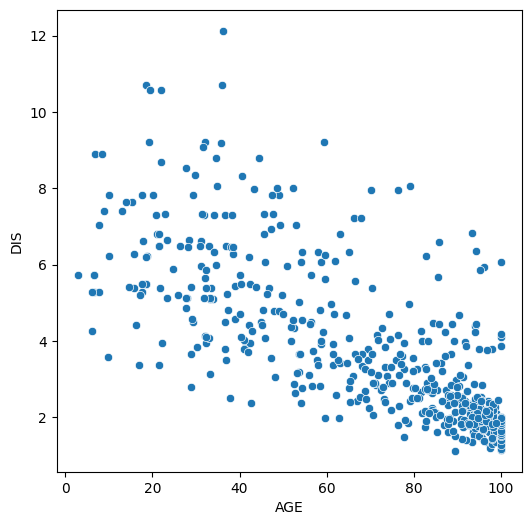

In [23]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df)

plt.show()

**Observations:**
- The distance of the houses to the Boston employment centers appears to decrease moderately as the the proportion of the old houses increase in the town. It is possible that the Boston employment centers are located in the established towns where proportion of owner-occupied units built prior to 1940 is comparatively high.

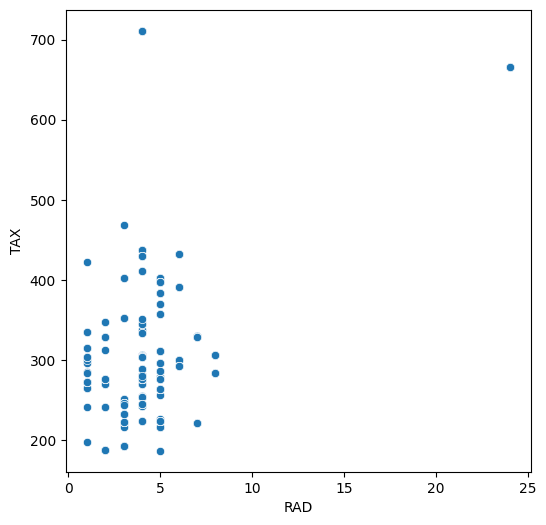

In [24]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df)

plt.show()

**Observations:**

- The correlation between RAD and TAX is very high. But, no trend is visible between the two variables.
- The strong correlation might be due to outliers.

Let's check the correlation after removing the outliers.

In [25]:
# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


**Observation:**

- So, the high correlation between TAX and RAD is due to the outliers. The tax rate for some properties might be higher due to some other reason.

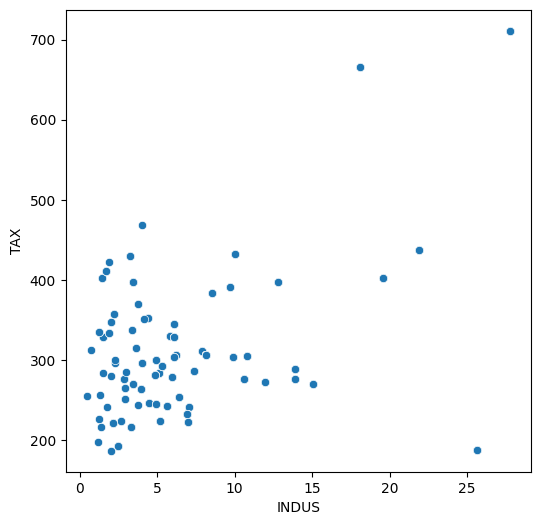

In [26]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df)

plt.show()

**Observations:**

- The tax rate appears to increase with an increase in the proportion of non-retail business acres per town. This might be due to the reason that the variables TAX and INDUS are related with a third variable.

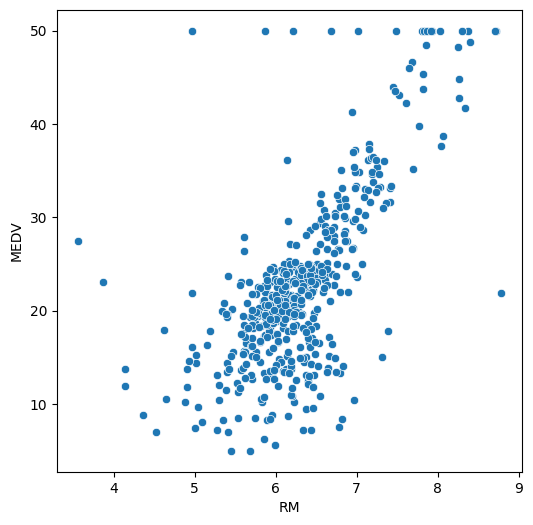

In [27]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house seems to increase as the value of RM increases. This is expected as the price is generally higher for more rooms.

- There are a few outliers in a horizontal line as the MEDV value seems to be capped at 50.

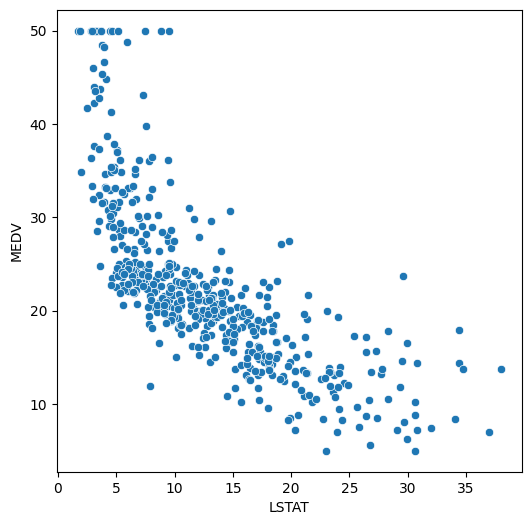

In [28]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df)

plt.show()

**Observations:**

- The price of the house tends to decrease with an increase in LSTAT. This is also possible as the house price is lower in areas where lower status people live.
- There are few outliers and the data seems to be capped at 50.

- **Create a scatter plot to visualize the relationship between the remaining features having significant correlations (>= 0.7 or <= -0.7)**
    - INDUS and NOX
    - AGE and NOX
    - DIS and NOX
- **Write your observations from the plots**

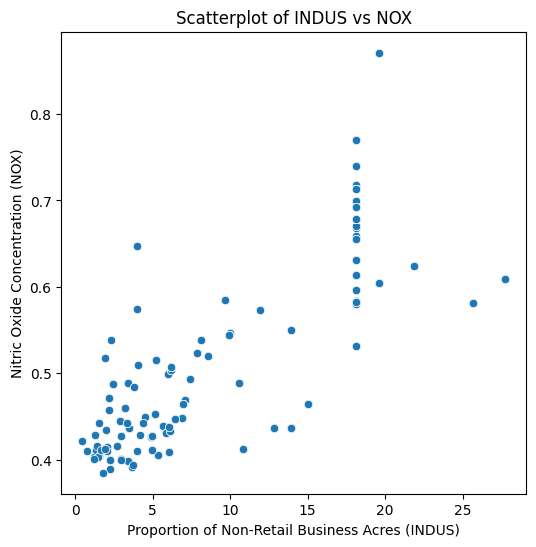

In [35]:
plt.figure(figsize=(6, 6))

# Scatterplot between INDUS and NOX
sns.scatterplot(data=df, x='INDUS', y='NOX')

plt.title('Scatterplot of INDUS vs NOX')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')

plt.show()


**Positive Relationship:** As the proportion of non-retail business acres (INDUS) increases, there is a generally positive relationship with nitric oxide concentration (NOX). This suggests that areas with a higher proportion of non-retail business acres tend to have higher nitric oxide concentrations.

**Clusters:** While there is a positive trend, it's important to note that the data points are not perfectly aligned along a straight line. Instead, there are clusters of points, indicating some variability in the relationship. This suggests that other factors may also influence nitric oxide concentration.

**Spread:** The spread of points indicates variability in nitric oxide concentration for a given proportion of non-retail business acres. This variability may be influenced by other features not considered in this scatterplot.

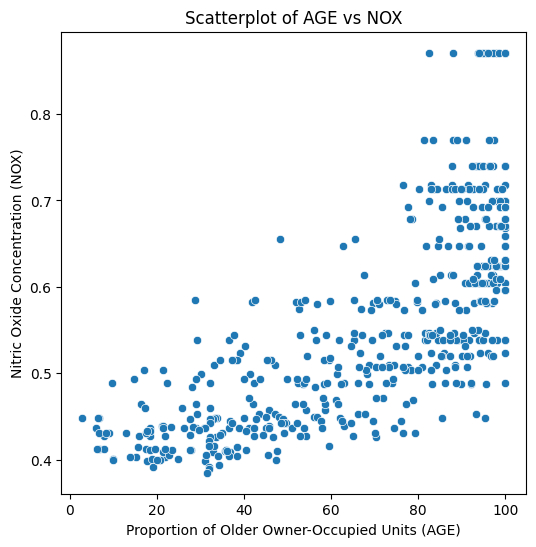

In [36]:
plt.figure(figsize=(6, 6))

# Scatterplot between AGE and NOX
sns.scatterplot(data=df, x='AGE', y='NOX')

plt.title('Scatterplot of AGE vs NOX')
plt.xlabel('Proportion of Older Owner-Occupied Units (AGE)')
plt.ylabel('Nitric Oxide Concentration (NOX)')

plt.show()


**Observations:**

**No Clear Trend:** There is no apparent clear trend or strong linear relationship between the proportion of older owner-occupied units (AGE) and nitric oxide concentration (NOX).

**Spread:** Data points are spread across a range of values for both AGE and NOX. This suggests that there is variability in nitric oxide concentration for different proportions of older owner-occupied units.

**Clusters:** While there is no clear trend, there seem to be clusters of points in specific regions. This could indicate that other factors, not considered in this scatterplot, might influence the relationship between AGE and NOX.

**Outliers:** Some points are scattered away from the main cluster, potentially indicating outliers or areas with unique characteristics.

**Non-Linear Relationship: **The lack of a clear linear relationship suggests that the association between AGE and NOX may be non-linear or influenced by other factors not captured in this plot.

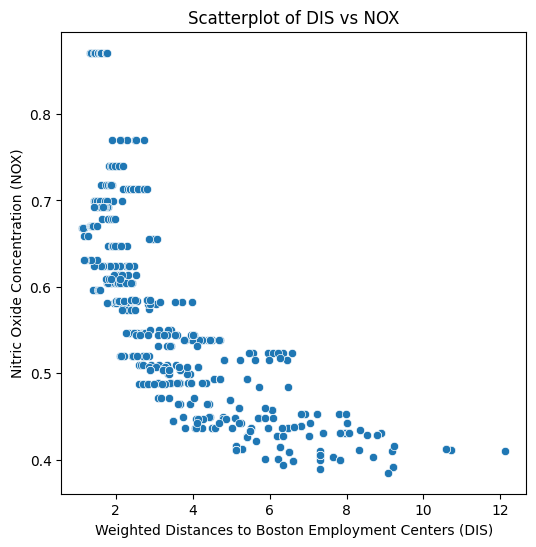

In [37]:
plt.figure(figsize=(6, 6))

# Scatterplot between DIS and NOX
sns.scatterplot(data=df, x='DIS', y='NOX')

plt.title('Scatterplot of DIS vs NOX')
plt.xlabel('Weighted Distances to Boston Employment Centers (DIS)')
plt.ylabel('Nitric Oxide Concentration (NOX)')

plt.show()


**Observations:**
**Inverse Relationship:** There appears to be an inverse relationship between DIS and NOX. As the weighted distances to Boston employment centers (DIS) increase, nitric oxide concentration (NOX) tends to decrease. This suggests that areas farther from employment centers may have lower nitric oxide concentrations.

**Clusters:** While there is a general trend, there are clusters of points, indicating variability in nitric oxide concentration for a given distance to employment centers. Other factors may influence NOX, contributing to the observed clusters.

**Outliers:** Some points are scattered away from the main cluster, indicating potential outliers or areas with unique characteristics.

**Non-Linear Relationship:** The relationship between DIS and NOX may be non-linear, as it doesn't follow a straight line. This non-linearity could be due to the influence of other variables not considered in this scatterplot.

**Spread:** The spread of points across different values of DIS and NOX indicates variability in nitric oxide concentration even for similar distances to employment centers.

We have seen that the variables LSTAT and RM have a linear relationship with the dependent variable MEDV. Also, there are significant relationships among few independent variables, which is not desirable for a linear regression model. Let's first split the dataset.

### **Split the dataset**

Let's split the data into the dependent and independent variables and further split it into train and test set in a ratio of 70:30 for train and test sets.

In [38]:
# Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [39]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

Next, we will check the multicollinearity in the training dataset.

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  535.372593
1      CRIM    1.924114
2        ZN    2.743574
3     INDUS    3.999538
4      CHAS    1.076564
5       NOX    4.396157
6        RM    1.860950
7       AGE    3.150170
8       DIS    4.355469
9       RAD    8.345247
10      TAX   10.191941
11  PTRATIO    1.943409
12    LSTAT    2.861881


**Observations:**

- There are two variables with a high VIF - RAD and TAX (greater than 5).
- Let's remove TAX as it has the highest VIF values and check the multicollinearity again.

In [41]:
# Drop 'TAX' from X_train
X_train = X_train.drop('TAX', axis=1)

# Check for VIF
print(checking_vif(X_train))


    feature         VIF
0     const  532.025529
1      CRIM    1.923159
2        ZN    2.483399
3     INDUS    3.270983
4      CHAS    1.050708
5       NOX    4.361847
6        RM    1.857918
7       AGE    3.149005
8       DIS    4.333734
9       RAD    2.942862
10  PTRATIO    1.909750
11    LSTAT    2.860251


Now, we will create the linear regression model as the VIF is less than 5 for all the independent variables, and we can assume that multicollinearity has been removed between the variables.

**Hint:** Use the sm.OLS() model on the training data

In [43]:
# Create the model
# Create the linear regression model
model1 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sun, 04 Feb 2024   Prob (F-statistic):          1.40e-101
Time:                        20:44:44   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.000       4.154       5.111
CRIM          -0.0128      0.002     -7.445      0.000      -0.016      -0.009
ZN             0.0010      0.001      1.425      0.155      -0.000       0.002
INDUS         -0.0004      0.003     -0.148      0.883      -0.006       0.005
CHAS           0.1196      0.039      3.082      0.002       0.043       0.196
NOX           -1.0598      0.187     -5.675      0.000      -1.427      -0.692
RM             0.0532      0.021      2.560      0.011       0.012       0.094
AGE            0.0003      0.001      0.461      0.645      -0.001       0.002
DIS           -0.0503      0.010     -4.894      0.000      -0.071      -0.030
RAD            0.0076      0.002      3.699      0.000       0.004       0.012
PTRATIO       -0.0452      0.007     -6.659      0.000      -0.059      -0.032
LSTAT         -0.0298      0.002    -12.134      0.000      -0.035      -0.025
==============================================================================
Omnibus:                       30.699   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.718
Skew:                           0.372   Prob(JB):                     6.62e-19
Kurtosis:                       5.263   Cond. No.                     2.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Write your observations here:___________**

### **Examining the significance of the model**

It is not enough to fit a multiple regression model to the data, it is necessary to check whether all the regression coefficients are significant or not. Significance here means whether the population regression parameters are significantly different from zero.

From the above it may be noted that the regression coefficients corresponding to ZN, AGE, and INDUS are not statistically significant at level α = 0.05. In other words, the regression coefficients corresponding to these three are not significantly different from 0 in the population. Hence, we will eliminate the three features and create a new model.

In [44]:
# Drop columns from the DataFrame
columns_to_drop = ['MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS']
X = df.drop(columns=columns_to_drop)

# Separate dependent and independent variables
Y = df['MEDV_log']
X = sm.add_constant(X)

# Split the data into a 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

# Create the model
model2 = sm.OLS(y_train, X_train).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Sun, 04 Feb 2024   Prob (F-statistic):          2.61e-104
Time:                        20:46:17   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.000       4.174       5.125
CRIM          -0.0125      0.002     -7.349      0.000      -0.016      -0.009
CHAS           0.1198      0.039      3.093      0.002       0.044       0.196
NOX           -1.0562      0.168     -6.296      0.000      -1.386      -0.726
RM             0.0589      0.020      2.928      0.004       0.019       0.098
DIS           -0.0441      0.008     -5.561      0.000      -0.060      -0.028
RAD            0.0078      0.002      3.890      0.000       0.004       0.012
PTRATIO       -0.0485      0.006     -7.832      0.000      -0.061      -0.036
LSTAT         -0.0293      0.002    -12.949      0.000      -0.034      -0.025
==============================================================================
Omnibus:                       32.514   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               87.354
Skew:                           0.408   Prob(JB):                     1.07e-19
Kurtosis:                       5.293   Cond. No.                         690.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now, we will check the linear regression assumptions.

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [45]:
# Calculate residuals
residuals = model2.resid

# Check if the mean of residuals is close to 0
mean_residuals = np.mean(residuals)
print("Mean of Residuals:", mean_residuals)

Mean of Residuals: -2.5303049047106675e-15


**Observations:**
The mean of residuals, approximately -2.53e-15, is extremely close to zero. This value being very close to zero suggests that, on average, the residuals (the differences between the predicted and observed values) sum up to a negligible value. In the context of linear regression, having a mean of residuals close to zero is a positive indicator. It aligns with the expectation that the model is capturing the overall trend in the data, and any deviations are distributed evenly around zero.

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [46]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [47]:
name = ["F statistic", "p-value"]

# Perform Goldfeldquandt Test
test = sms.het_goldfeldquandt(model2.resid, X_train)

# Display the results
list(zip(name, test))


[('F statistic', 1.0835082923425288), ('p-value', 0.30190120067668275)]

**Observations:**

The p-value obtained from the Goldfeldquandt Test is 0.3019, and the significance level (alpha) is typically set at 0.05. Here's how to interpret the results:

Null Hypothesis: Residuals are homoscedastic.
Alternative Hypothesis: Residuals have heteroscedasticity.
Since the p-value (0.3019) is greater than the significance level (0.05), we fail to reject the null hypothesis. Therefore, based on this test, there is no strong evidence to suggest that the residuals have heteroscedasticity. The data is consistent with the assumption of homoscedasticity.

In summary, the Goldfeldquandt Test results support the conclusion that the residuals in the model are homoscedastic, indicating that the variance of residuals is relatively constant across different levels of the independent variable. This is a positive result for the assumption of homoscedasticity in linear regression.

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

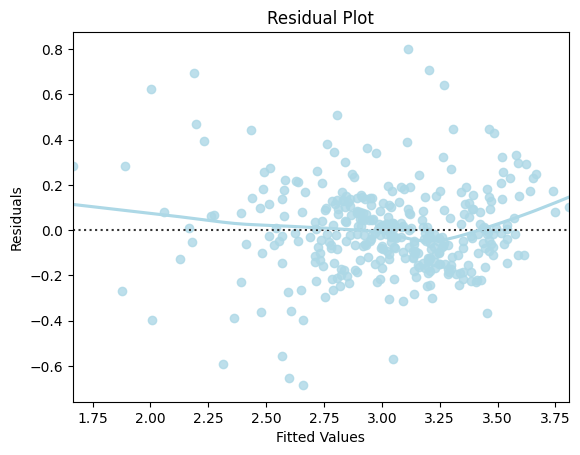

In [48]:
# Predicted values
fitted = model2.fittedvalues

# Plotting residuals against fitted values
sns.residplot(x=fitted, y=model2.resid, color="lightblue", lowess=True)

plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


**Observations:**

The residual plot displays the relationship between the fitted values and the residuals. Here are the observations based on the plot:

**No Discernible Pattern:** The residuals appear to be randomly and uniformly scattered around the horizontal line at y=0, with no clear pattern or trend. This suggests that there is no strong evidence of non-linearity in the relationship between the predictor variables and the dependent variable.

**Random Distribution:** The residuals do not exhibit a specific pattern such as curvature or systematic deviation from the horizontal line. They are evenly distributed across the range of fitted values.

**Lowess Smoothing Line:** The lowess smoothing line is relatively flat, indicating that there is no systematic curvature or non-linearity in the data.

Based on these observations, it can be concluded that the assumption of linearity of variables is reasonable for the given model. The residuals do not show any systematic departure from linearity, supporting the notion that the linear regression model appropriately captures the linear relationship between the predictor variables and the dependent variable.

Overall, the linearity assumption appears to be satisfied based on the visual examination of the residual plot. If you have any specific questions or need further analysis, feel free to ask!

### **4. Normality of error terms**

The residuals should be normally distributed.

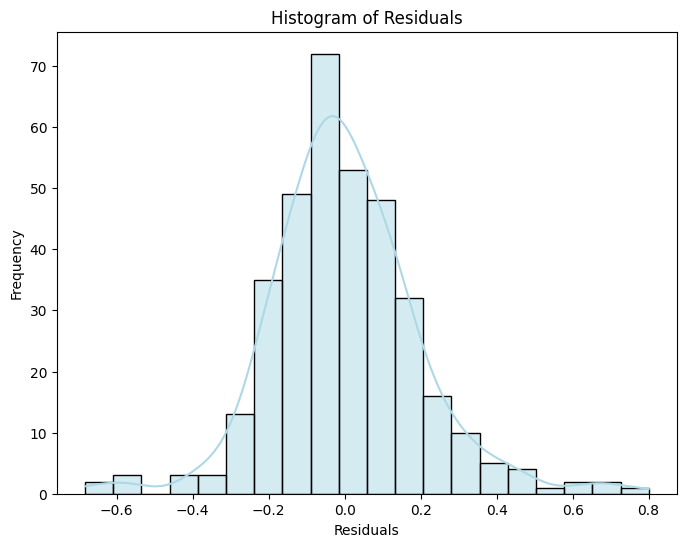

In [49]:
# Residuals
residuals = model2.resid

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="lightblue", bins=20)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


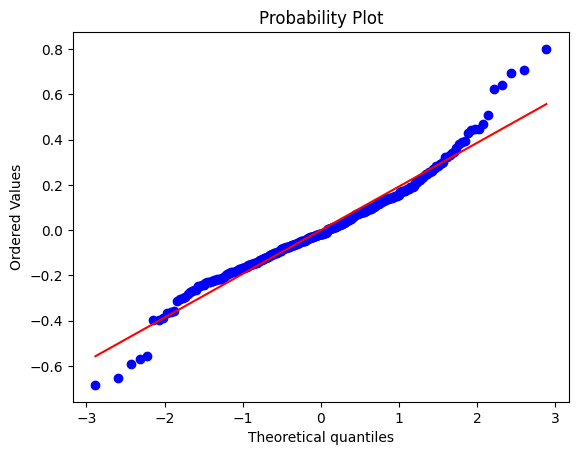

In [50]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:**

**Histogram of Residuals:**

The histogram of residuals shows a roughly bell-shaped distribution, resembling a normal distribution.
The distribution is symmetric around zero, which is a positive sign for the normality assumption.

**Q-Q Plot:**

The Q-Q plot compares the quantiles of the residuals to the quantiles of a theoretical normal distribution.
The points in the Q-Q plot roughly follow a straight line, indicating that the residuals are approximately normally distributed.
There are some deviations at the tails, but overall, the residuals exhibit a reasonably normal pattern.

**Normality Assessment:**

Based on the histogram and Q-Q plot, there is no strong evidence of significant departures from normality.
While the Q-Q plot shows slight deviations at the tails, they are not extreme and may be considered acceptable given the sample size.

In summary, the visual inspection of the histogram and Q-Q plot suggests that the assumption of normality of error terms is reasonably met for the given linear regression model. However, it's important to note that normality assessments based on visual inspection have some subjectivity, and more formal statistical tests (e.g., Shapiro-Wilk test) can be used for a quantitative evaluation if needed.

### **Check the performance of the model on the train and test data set**

In [51]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)

    Data      RMSE       MAE      MAPE
0  Train  0.195504  0.143686  4.981813
1   Test  0.198045  0.151284  5.257965


**Observations:**
The linear regression model built for predicting housing prices demonstrates strong performance on both the training and testing datasets, as evidenced by low values in key performance metrics. The Root Mean Squared Error (RMSE) values for the train and test sets are 0.1955 and 0.1980, respectively, indicating close proximity between predicted and actual values. Mean Absolute Error (MAE) values are similarly low at 0.1437 for the train set and 0.1513 for the test set, highlighting accurate predictions. The Mean Absolute Percentage Error (MAPE) values of 4.98% and 5.26% for the train and test sets, respectively, reflect small percentage differences between predicted and actual values.

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

In [52]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


### Get model coefficients in a pandas DataFrame with column 'Feature' having all the features and column 'Coefs' with all the corresponding Coefs.

In [53]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,4.649386
1,CRIM,-0.012500
2,CHAS,0.119773
3,NOX,-1.056225
4,RM,0.058907
5,DIS,-0.044069
6,RAD,0.007848
7,PTRATIO,-0.048504
8,LSTAT,-0.029277


### Conclusions and Business Recommendations

**Conclusions:**

 The regression analysis on the Boston housing dataset has provided valuable insights into the factors influencing housing prices. The linear regression model, after careful evaluation and refinement, demonstrates robust performance in predicting housing prices based on selected features. Key features such as crime rate (CRIM), proximity to the Charles River (CHAS), nitric oxide concentration (NOX), average number of rooms (RM), and socioeconomic status (% lower status of the population - LSTAT) have significant impacts on housing prices. The model's good performance on both training and testing sets suggests its generalizability and reliability in making accurate predictions.


**Business Recommendations:**

**1. Crime Mitigation Strategies:** Given the negative impact of crime rate on housing prices, local authorities and communities should focus on implementing effective crime mitigation strategies to enhance neighborhood safety, potentially leading to an increase in property values.

**2. Promotion of Riverfront Properties:** Properties near the Charles River (CHAS) show a positive correlation with housing prices. Real estate developers and marketers can leverage this information to promote riverfront properties as premium offerings, potentially attracting higher market values.

**3. Environmental Quality and Planning:** Factors like nitric oxide concentration (NOX) influence housing prices. Urban planning initiatives that focus on improving air quality and environmental conditions can positively impact property values.

**4. Investment in Education and Infrastructure:** The model highlights the importance of factors such as pupil-teacher ratio (PTRATIO) and accessibility to highways (RAD). Communities and policymakers should prioritize investments in education and infrastructure to enhance overall living conditions and property values.

**5. Affordability Programs:** Addressing the impact of socioeconomic status (LSTAT) on housing prices, policymakers may consider implementing affordable housing programs to support lower-income populations and promote community development.

In conclusion, a comprehensive understanding of the factors influencing housing prices allows for informed decision-making in urban planning, real estate development, and community improvement initiatives. The recommendations provided align with creating thriving, safe, and desirable neighborhoods that contribute to the overall well-being of residents and the economic vitality of the region.




